## Import Packages, Set Paths Dynamically

In [289]:
import geopandas as gpd
import osmnx as ox
import folium
from shapely.geometry import box, Polygon, Point, LineString, MultiLineString
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import numpy as np

In [290]:
# get path to project root directory
project_root = Path.cwd().parents[0]

# build path to yaml config file
config_path = project_root/"configs"/"paths.yaml"

In [291]:
# load yaml file into a python dictionary called paths
with open(config_path) as f:
    paths = yaml.safe_load(f)

paths

{'data': {'external': 'data/external',
  'raw': 'data/raw',
  'processed': 'data/processed',
  'results': 'results'},
 'outputs': {'dynamic_maps': 'outputs/maps/dynamic',
  'static_maps': 'output/maps/static',
  'figures': 'output/figures',
  'tables': 'outputs/tables'}}

In [292]:
# build data directory using paths from yaml config
data_dir = project_root/paths['data']['processed']


# finally build path to our geojson file
settlements_path = data_dir / "UNHCR_poc_boundaries-Uganda_attributed_deduped.geojson"

In [293]:
# build path to output directory for processed grid data
output_dir = project_root/paths['data']['processed']

# build path to output directory for maps
maps_dir = project_root/paths['outputs']['dynamic_maps']

## Plot Nakivale Settlement, Bounding Box

In [294]:
settlements = gpd.read_file(settlements_path).to_crs(crs = 32636)
settlements

,id,name,objectid,pcode,iso3,name_2,name_alt,loc_type,loc_subtype,createdate,...,source,unhcr_assist,footnote,comments,status,globalid,lat,lon,date_str,geometry
0,0,Palabek,27594.0,UGAs032271,UGA,Palabek RC,None,37.0,None,1.541376e+12,...,UNHCR,1.0,None,None,1.0,{9611730D-6DCD-4DBC-BF0F-C4156A5FA034},3.363550,32.415010,2018-11-04,"POLYGON ((451961.635 371230.291, 451957.294 37..."
1,1,Rhino,26820.0,UGAs032256,UGA,Omugo RC,None,37.0,***,1.524182e+12,...,UNHCR,1.0,RE-2013-SSD,Rhino Extention,1.0,{FE7358D3-BC57-4CB4-B23E-FA9628F92130},3.180525,31.178464,2018-04-19,"POLYGON ((296982.034 349810.434, 296973.898 34..."
2,2,Imvepi,168.0,UGAs990098,UGA,Imvepi RC,None,37.0,***,1.490746e+12,...,UNHCR,NaN,None,Reception centre,1.0,{B5ABBC96-47FA-442D-9CC6-2A1BB7124BEF},3.253135,31.277129,2017-03-28,"POLYGON ((302755.275 357465.263, 302626.34 357..."
3,3,Bidibidi,21261.0,UGAs027216,UGA,Bidibidi,None,35.0,***,1.476144e+12,...,UNHCR,NaN,,Northern UGA,1.0,{E925BA28-6E85-4E79-AA35-A5713AE76960},3.440858,31.386517,2016-10-10,"POLYGON ((317116.966 395596.912, 315637.754 39..."
4,4,Pagrinya,20314.0,UGAs004684,UGA,Pagrinya,None,35.0,***,1.472170e+12,...,UNHCR,1.0,None,Northern UGA,1.0,{FFF34AD8-C4B5-4450-9768-05C34E90A2B9},3.379000,32.009250,2016-08-25,"POLYGON ((390511.927 372479.037, 390523.356 37..."
5,5,Mungula I,12606.0,UGAs004680,UGA,Mungula,None,35.0,***,1.431994e+12,...,UNHCR,NaN,RE-2013-SSD,Northern UGA,1.0,{83A3CD4D-9C6A-4A75-AFD3-C91E9637D6B1},3.192977,31.788150,2015-05-18,"POLYGON ((366175.479 352743.212, 366230.371 35..."
6,6,Ayilo 1,3441.0,UGAs004662,UGA,Ayilo 1,None,35.0,***,1.401667e+12,...,UNHCR,1.0,RE-2013-SSD,Northern UGA,1.0,{FD926792-2F62-48EE-8150-21AB071AAF91},3.296111,31.934722,2014-06-01,"MULTIPOLYGON (((381316.251 365396.781, 381246...."
7,7,Ayilo 2,4758.0,UGAs004661,UGA,Ayilo 2,None,35.0,***,1.401667e+12,...,UNHCR,1.0,RE-2013-SSD,Northern UGA,1.0,{74E1BDBF-7BCD-4016-9A8E-D3790060F542},3.256600,31.962333,2014-06-01,"POLYGON ((382562.217 360679.927, 382876.264 36..."
8,8,Nyumanzi,3515.0,UGAs004664,UGA,Nyumanzi,None,35.0,***,1.401667e+12,...,UNHCR,1.0,RE-2013-SSD,Northern UGA,1.0,{211C8C6C-1CDF-49A7-9F7A-1027182F3BA6},3.456667,31.946944,2014-06-01,"POLYGON ((383038.427 382116.404, 383074.939 38..."
9,9,Boroli,3475.0,UGAs004663,UGA,Boroli Settlement,None,35.0,***,1.401667e+12,...,UNHCR,1.0,RE-2013-SSD,Northern UGA,1.0,{52C6351D-3E8E-4576-823D-DE3FC023B019},3.299444,31.866389,2014-06-01,"MULTIPOLYGON (((374793.794 364159.776, 374937...."


In [295]:
# subset out nakivale settlement 
nakivale = settlements[settlements['name'].str.lower() == 'nakivale']

In [296]:
# # export Nakivale geojson
# nakivale.to_file(output_dir/"UNHCR_poc_boundaries-Uganda_nakivale.geojson", driver="GeoJSON")

In [297]:
# get bounding box vertices
minx, miny, maxx, maxy = nakivale.total_bounds

# build bounding box geodataframe
bbox = box(minx, miny, maxx, maxy)
bbox_gdf = gpd.GeoDataFrame(['nakivale'], geometry = [bbox], crs = nakivale.crs)

C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\756326084.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


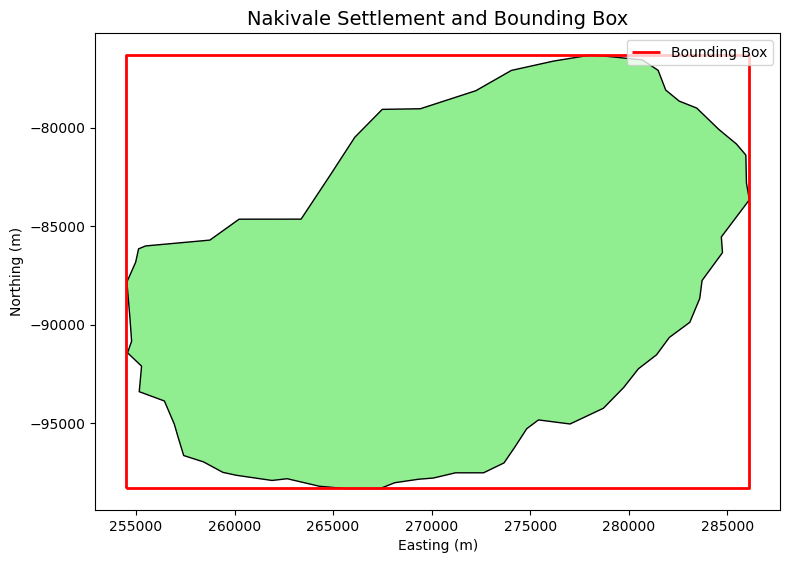

In [298]:
# plot nakivale and its bounding box
fig, ax = plt.subplots(figsize=(8, 8))

# plot the Nakivale polygon(s)
nakivale.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=1, label='Nakivale Settlement')

# Plot the bounding box outline
bbox_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Bounding Box')

# Add labels and styling
ax.set_title("Nakivale Settlement and Bounding Box", fontsize=14)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.legend()

plt.tight_layout()
plt.show()

## Make Grid Polygons

In [299]:
def make_grid_polygons(polygon, resolution, buffer_length = 0):


    # buffer by desired buffer
    polygon_buffered = polygon.buffer(buffer_length)

    #  get bounding box
    minx, miny, maxx, maxy = polygon_buffered.bounds

    # generate grid of bottom left corners
    cols = np.arange(minx, maxx+resolution,resolution)
    rows = np.arange(miny, maxy+resolution, resolution)

    cells = []
    for x in cols:
        for y in rows:
            cell_center = Point(x + resolution/2, y + resolution/2)
            if polygon_buffered.contains(cell_center):
                cell = [
                    (x,y),
                    (x+resolution, y),
                    (x+resolution, y+ resolution),
                    (x, y+resolution)
                ]
                cells.append(Polygon(cell))
    return cells

In [300]:
def make_grid_by_polygon(gdf, resolution, buffer_length = 0):
    if gdf.crs is None:
        raise ValueError("Input GeoDataFrame has no CRS defined. Please set a projected CRS before using this function.")

    # Check for geographic CRS (degrees)
    if gdf.crs.is_geographic:
        raise ValueError(
            f"Input CRS {gdf.crs.to_string()} is geographic (degrees). "
            "Please reproject to a projected CRS (e.g., UTM) before generating hex grids."
        )
    
    all_cells = []
    ids = []

    for idx, row in gdf.iterrows():
        polygon = row.geometry
        cells = make_grid_polygons(polygon, resolution, buffer_length)
        all_cells.extend(cells)
        ids.extend([idx]*len(cells))

    cells_gdf = gpd.GeoDataFrame({'poly_ids': ids, 'geometry': all_cells}, crs = gdf.crs)
    # cells_gdf['oid'] = np.arange(1, len(cells_gdf)+1)
    return cells_gdf


In [301]:
grid_cells = make_grid_by_polygon(nakivale, 1000, 2000) # On QGIS it looks like 1:1500 scale is around the coarsest we can go, this is relatively compatible with the 1000m resolution grid cell

C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\631551259.py:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


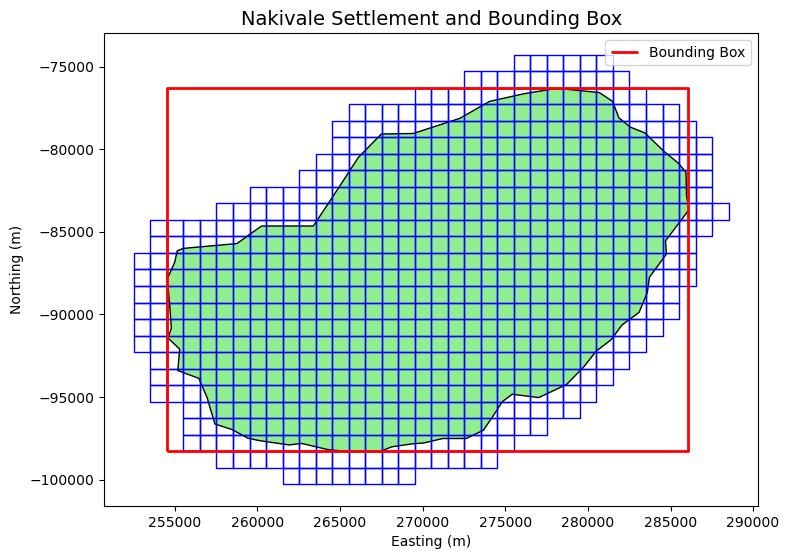

In [302]:
# plot nakivale and its bounding box
fig, ax = plt.subplots(figsize=(8, 8))

# plot the Nakivale polygon(s)
nakivale.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=1, label='Nakivale Settlement')

# Plot the bounding box outline
bbox_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Bounding Box')

# plot the grid cells
grid_cells.plot(ax =ax, color = 'none', edgecolor='blue', linewidth = 1, label = 'Grid Cells' )

# Add labels and styling
ax.set_title("Nakivale Settlement and Bounding Box", fontsize=14)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.legend()

plt.tight_layout()
plt.show()

In [303]:
# grid_cells.to_file(output_dir/"gridcells_nakivale_1000m_v1.geojson", driver = "GeoJSON")

In [304]:
grid_cells.reset_index(names = 'OID', inplace = True)

In [305]:
grid_cells

,OID,poly_ids,geometry
0,0,11,"POLYGON ((252517.531 -92282.932, 253517.531 -9..."
1,1,11,"POLYGON ((252517.531 -91282.932, 253517.531 -9..."
2,2,11,"POLYGON ((252517.531 -90282.932, 253517.531 -9..."
3,3,11,"POLYGON ((252517.531 -89282.932, 253517.531 -8..."
4,4,11,"POLYGON ((252517.531 -88282.932, 253517.531 -8..."
...,...,...,...
637,637,11,"POLYGON ((286517.531 -83282.932, 287517.531 -8..."
638,638,11,"POLYGON ((286517.531 -82282.932, 287517.531 -8..."
639,639,11,"POLYGON ((286517.531 -81282.932, 287517.531 -8..."
640,640,11,"POLYGON ((286517.531 -80282.932, 287517.531 -8..."


## Load OSM Dataset

In [306]:
def get_osm_features_for_settlement(settlements_gdf, name, tags):
    """
    Query OSM features for a specific settlement in settlements_gdf by name

    Params:
    settlements_gdf : GeoDataFrame
        GeoDataFrame containing settlement polygons with a 'name' column

    name : str
        Name of the settlement to query

    tags: dict
        OSM tags to query, e.g. {"highway: True}

    Returns:
        
    """

    # match settlement by name
    match = settlements_gdf[settlements_gdf["name"].str.lower() == name.lower()]
    if match.empty:
        raise ValueError(f"No settlement found with name '{name}'")  

    # extract geometry of settlement
    geom = match.geometry.iloc[0]

    # query osm API
    features = ox.features_from_polygon(geom, tags)

    return features

In [307]:
roads_and_paths = get_osm_features_for_settlement(settlements.to_crs(crs = 4326), "Nakivale", {"highway": True}).to_crs(32636)

In [308]:
# filtering for urban buildup, highway and roadways
roads = roads_and_paths[roads_and_paths['highway'].isin(['primary', 'secondary', 'tertiary',
    'unclassified', 'service', 'give_way', 'crossing', 'secondary_link', 'platform'])].copy()

# filtering for more informal development, footpaths and residential
footpaths = roads_and_paths[roads_and_paths['highway'].isin(['path', 'footway', 'track', 'pedestrian', 'steps', 'residential'])].copy()

roads = roads[roads.length > 0.0001]
footpaths = footpaths[footpaths.length > 0.0001]

C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\1804289636.py:21: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


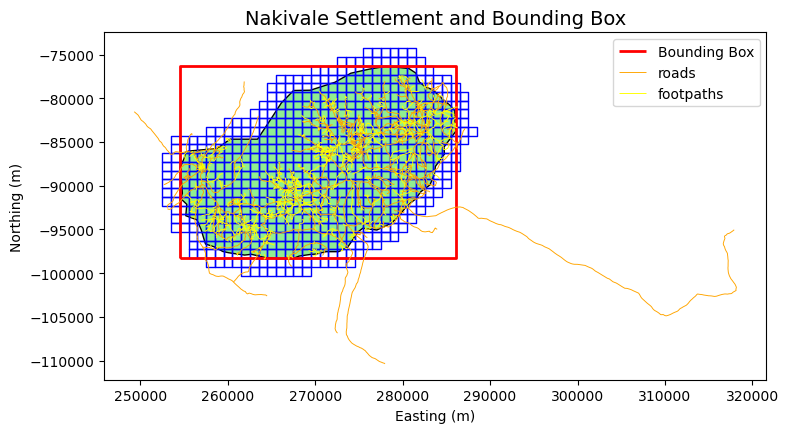

In [309]:
# plot nakivale and its bounding box
fig, ax = plt.subplots(figsize=(8, 8))

# plot the Nakivale polygon(s)
nakivale.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=1, label='Nakivale Settlement')

# Plot the bounding box outline
bbox_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Bounding Box')

# plot the grid cells
grid_cells.plot(ax =ax, color = 'none', edgecolor='blue', linewidth = 1, label = 'Grid Cells' )

# plot roads and paths
roads.plot(ax=ax, color = 'orange',linewidth = 0.67, label = 'roads')
footpaths.plot(ax =ax, color = 'yellow', linewidth = 0.67, label = 'footpaths')

# Add labels and styling
ax.set_title("Nakivale Settlement and Bounding Box", fontsize=14)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.legend()

plt.tight_layout()
plt.show()

In [310]:
center_x = nakivale.to_crs(4326).geometry.centroid.x
center_y = nakivale.to_crs(4326).geometry.centroid.y
center_point = [center_y, center_x]

m2 = folium.Map(location = center_point,
                 zoom_start = 10, 
                 tiles = None
                 )

folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri World Imagery',
    name='Esri Aerial Imagery',
    show = True
).add_to(m2)

folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
    attr='Google Maps Satellite Imagery',
    name='Google Maps Satellite Imagery',
    show =False
).add_to(m2)

folium.GeoJson(nakivale,
               name = "Nakivale",
               style_function = lambda x: {
                   'color': "white",
                   'weight': 3}).add_to(m2)

folium.GeoJson(roads,
               name = "roads",
               style_function=lambda x:{
                   'color': "#db4b12",
                   'weight': 2,
               },
               tooltip = folium.GeoJsonTooltip(fields= [c for c in ['crossing', 'highway']])
               ).add_to(m2)

folium.GeoJson(footpaths,
               name = "footpaths",
               style_function=lambda x:{
                   'color': "#dbba12",
                   'weight': 2,
               },
               tooltip = folium.GeoJsonTooltip(fields= [c for c in ['crossing', 'highway']])
               ).add_to(m2)

folium.GeoJson(grid_cells,
               name = "1000m grid",
               style_function=lambda x:{
                   'color': "#12d6d3",
                   'weight': 2,
               },
               tooltip = folium.GeoJsonTooltip(fields= [c for c in ['OID', 'poly_ids']])
               ).add_to(m2)


folium.LayerControl().add_to(m2)
m2.save(maps_dir/"nakivale_osm_overlay_grid_1000m.html")

C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\2255972461.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_x = nakivale.to_crs(4326).geometry.centroid.x
C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\2255972461.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_y = nakivale.to_crs(4326).geometry.centroid.y
c:\Users\Zachary\anaconda3\envs\uganda-osm\Lib\site-packages\folium\utilities.py:103: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
c:\Users\Zachary\anaconda3\envs\uganda-osm\Lib\site-packages\folium\utilities.py:109: FutureWarning: Calling float on a single element Ser

In [323]:
def summarize_road_density(grid_gdf, roads_gdf, oid_field="oid", sample_oids=None):

    # Select sample cells
    if sample_oids is not None:
        sampled_grid = grid_gdf[grid_gdf[oid_field].isin(sample_oids)].copy()
    else:
        sampled_grid = grid_gdf.copy()

    # Ensure same CRS (project to meters if needed)
    if roads_gdf.crs != grid_gdf.crs:
        roads_gdf = roads_gdf.to_crs(grid_gdf.crs)

    # Prepare results list
    results = []

    for idx, cell in sampled_grid.iterrows():
        cell_geom = cell.geometry

        # Clip roads within this grid cell
        roads_in_cell = gpd.clip(roads_gdf, gpd.GeoDataFrame(geometry=[cell_geom], crs=grid_gdf.crs))

        # Calculate metrics
        total_length_m = roads_in_cell.length.sum()
        n_segments = len(roads_in_cell)
        area_km2 = cell_geom.area / 1e6
        road_density_m_per_km2 = total_length_m / area_km2 if area_km2 > 0 else np.nan

        results.append({
            oid_field: cell[oid_field],
            "n_segments": n_segments,
            "total_length_m": total_length_m,
            "area_km2": area_km2,
            "road_density_m_per_km2": road_density_m_per_km2
        })

    # Merge results back into GeoDataFrame
    metrics_gdf = sampled_grid.merge(
        gpd.GeoDataFrame(results),
        on=oid_field,
        how="left"
    )

    return metrics_gdf

In [324]:
road_density = summarize_road_density(grid_cells, roads_and_paths, "OID")
road_density.sort_values(by = 'total_length_m', ascending = False)

,OID,poly_ids,geometry,n_segments,total_length_m,area_km2,road_density_m_per_km2
52,52,11,"POLYGON ((256517.531 -88282.932, 257517.531 -8...",169,11432.811126,1.0,11432.811126
422,422,11,"POLYGON ((274517.531 -86282.932, 275517.531 -8...",29,11136.770141,1.0,11136.770141
424,424,11,"POLYGON ((274517.531 -84282.932, 275517.531 -8...",26,8970.105539,1.0,8970.105539
329,329,11,"POLYGON ((270517.531 -86282.932, 271517.531 -8...",34,8621.650842,1.0,8621.650842
576,576,11,"POLYGON ((281517.531 -81282.932, 282517.531 -8...",25,8088.545624,1.0,8088.545624
...,...,...,...,...,...,...,...
29,29,11,"POLYGON ((255517.531 -97282.932, 256517.531 -9...",0,0.000000,1.0,0.000000
28,28,11,"POLYGON ((255517.531 -98282.932, 256517.531 -9...",0,0.000000,1.0,0.000000
3,3,11,"POLYGON ((252517.531 -89282.932, 253517.531 -8...",0,0.000000,1.0,0.000000
1,1,11,"POLYGON ((252517.531 -91282.932, 253517.531 -9...",0,0.000000,1.0,0.000000


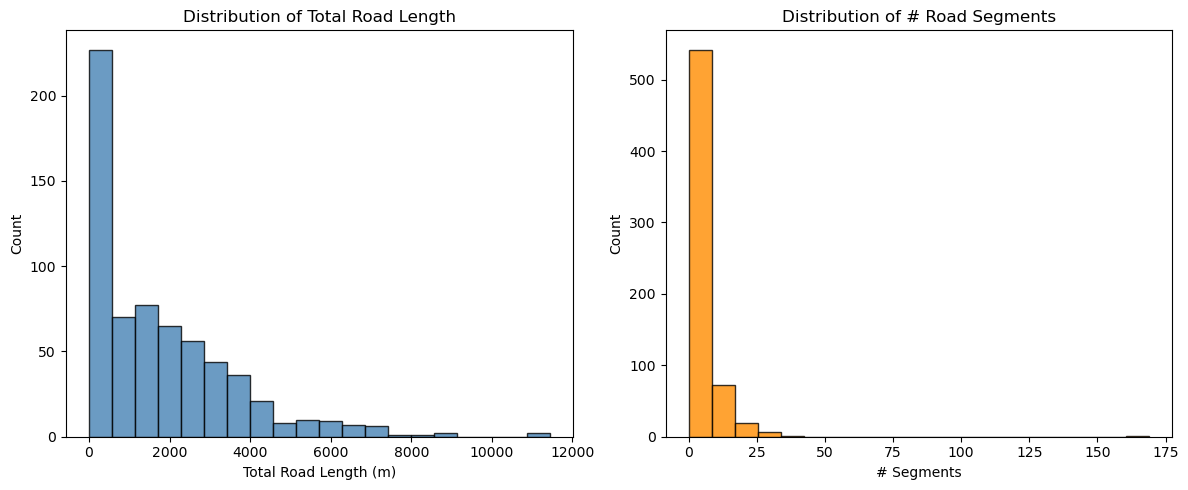

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram: total road length
axes[0].hist(road_density["total_length_m"], bins=20, color="steelblue", edgecolor="black", alpha=0.8)
axes[0].set_title("Distribution of Total Road Length")
axes[0].set_xlabel("Total Road Length (m)")
axes[0].set_ylabel("Count")

# Histogram: number of segments
axes[1].hist(road_density["n_segments"], bins=20, color="darkorange", edgecolor="black", alpha=0.8)
axes[1].set_title("Distribution of # Road Segments")
axes[1].set_xlabel("# Segments")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\2314745904.py:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


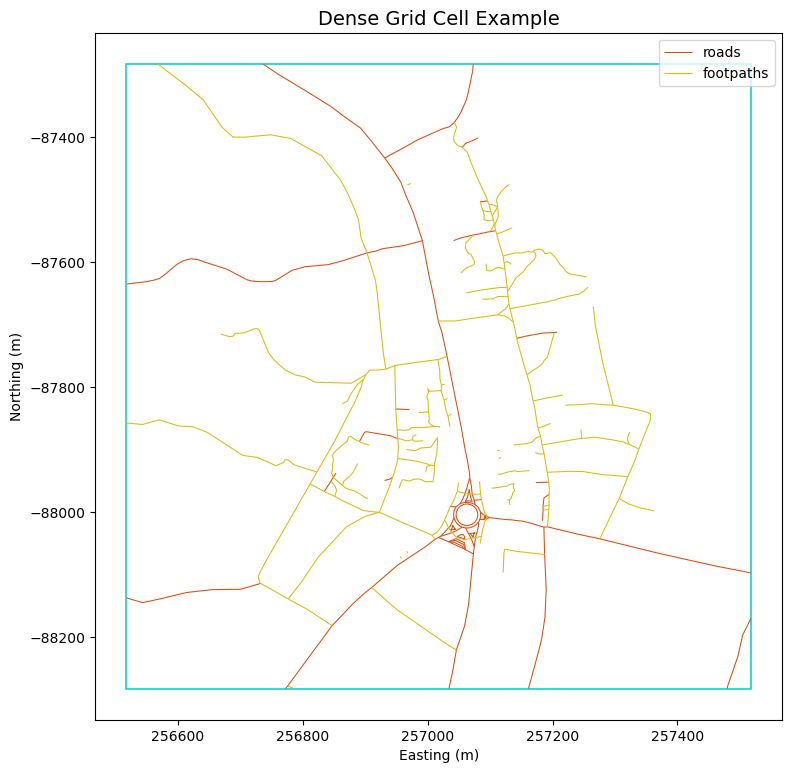

In [ ]:
dense_grid_cell = grid_cells[grid_cells['OID']==52]
roads_clipped = roads.clip(dense_grid_cell.geometry)
footpaths_clipped = footpaths.clip(dense_grid_cell.geometry)

# plot outlier grid cell
fig, ax = plt.subplots(figsize=(8, 8))

# plot the grid cells
dense_grid_cell.plot(ax =ax, color = 'none', edgecolor='#12d6d3', linewidth = 1.25, label = 'Dense Grid Cell' )

# plot roads and paths
roads_clipped.plot(ax=ax, color =  "#db4b12",linewidth = 0.75, label = 'roads')
footpaths_clipped.plot(ax =ax, color =  "#dbba12", linewidth = 0.75, label = 'footpaths')

# Add labels and styling
ax.set_title("Dense Grid Cell Example", fontsize=14)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.legend()

plt.tight_layout()
plt.show()

In [377]:
def compute_cell_road_metrics(cell, roads_gdf, footpaths_gdf):
    cell_gdf = gpd.GeoDataFrame([cell], crs=roads_gdf.crs)
    
    roads_clipped = gpd.clip(roads_gdf, cell_gdf)
    footpaths_clipped = gpd.clip(footpaths_gdf, cell_gdf)
    
    total_road_length = roads_clipped.length.sum()
    total_footpath_length = footpaths_clipped.length.sum()
    n_road_segments = len(roads_clipped)
    n_footpath_segments = len(footpaths_clipped)
    n_total_segments = n_road_segments + n_footpath_segments
    
    return {
        "cell_gdf": cell_gdf,
        "roads_clipped": roads_clipped,
        "footpaths_clipped": footpaths_clipped,
        "oid": cell["OID"],
        "n_road_segments": n_road_segments,
        "n_footpath_segments": n_footpath_segments,
        "n_total_segments": n_total_segments,
        "total_road_length_m": total_road_length,
        "total_footpath_length_m": total_road_length,
        "total_length_m": total_road_length + total_footpath_length
    }

In [386]:
def plot_sampled_cells(grid_gdf, roads_gdf, footpaths_gdf, n=10, sample_oids=None, figsize=(20, 8)):
    """
    Randomly select or specify grid cells and plot road/footpath networks with metrics.
    """
    # sample grid cells
    if sample_oids is not None:
        sampled_cells = grid_gdf[grid_gdf["OID"].isin(sample_oids)]
    else:
        sampled_cells = grid_gdf.sample(n=n, random_state=42)
    
    # ensure CRS consistency
    if roads_gdf.crs != grid_gdf.crs:
        roads_gdf = roads_gdf.to_crs(grid_gdf.crs)
    if footpaths_gdf.crs != grid_gdf.crs:
        footpaths_gdf = footpaths_gdf.to_crs(grid_gdf.crs)
    
    # prepare subplots
    n_cols = min(5, n)
    n_rows = int(np.ceil(n / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = np.array(axes).flatten()
    
    for i, (idx, cell) in enumerate(sampled_cells.iterrows()):
        ax = axes[i]
        metrics = compute_cell_road_metrics(cell, roads_gdf, footpaths_gdf)
        
        # plot layers
        metrics["cell_gdf"].boundary.plot(ax=ax, edgecolor="#12d6d3", linewidth=1.2)
        metrics["roads_clipped"].plot(ax=ax, color="#db4b12", linewidth=0.8)
        metrics["footpaths_clipped"].plot(ax=ax, color="#dbba12", linewidth=0.8)
        
        # zoom to extent
        xmin, ymin, xmax, ymax = metrics["cell_gdf"].total_bounds
        pad = 25
        ax.set_xlim(xmin - pad, xmax + pad)
        ax.set_ylim(ymin - pad, ymax + pad)

        # title with metrics
        ax.set_title(
            f"OID: {idx}\n",
            fontsize=10
        )

        # add text box inside subplot
        ax.text(
            0.75, 0.1,                                   # position (x, y) in axis coords (0–1)
            f"OID: {idx}\n"
            f"Density: {metrics['total_length_m']:.1f} m/km²\n"
            f"Segments: {metrics['n_total_segments']}",          # text
            transform=ax.transAxes,                       # use axis coordinate system
            fontsize=9,
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3')
        )
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect("equal", adjustable="box")
    
    # hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.suptitle("Sampled Grid Cells — Roads & Footpaths", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\3535481508.py:30: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  metrics["footpaths_clipped"].plot(ax=ax, color="#dbba12", linewidth=0.8)
C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\3535481508.py:29: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  metrics["roads_clipped"].plot(ax=ax, color="#db4b12", linewidth=0.8)
C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\3535481508.py:30: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  metrics["footpaths_clipped"].plot(ax=ax, color="#dbba12", linewidth=0.8)
C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\3535481508.py:29: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  metrics["roads_clipped"].plot(ax=ax, color="#db4b12", linewidth=0.8)
C:\Users\Zachary\AppData\Local\Temp\ipykernel_25

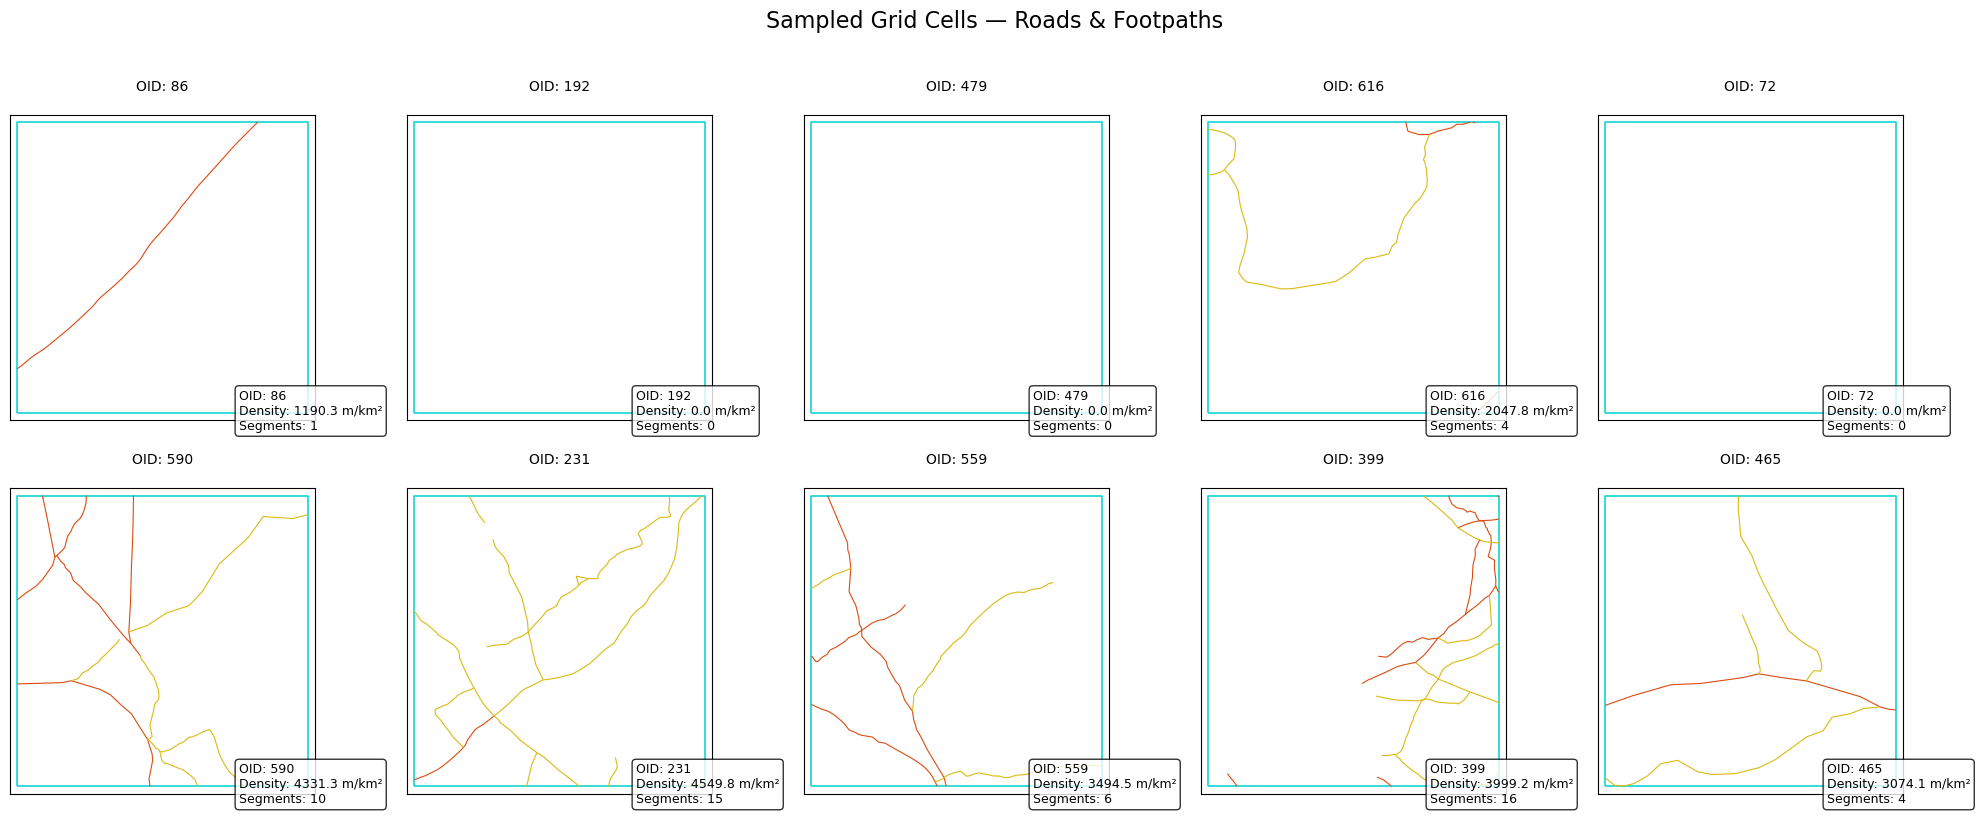

In [387]:
plot_sampled_cells(grid_cells, roads, footpaths, n=10)